In [1]:
import pandas as pd

## Data check

In [2]:
# Load the training data
train_data_path = '/Users/b._.chan/Documents/ML_model/weblog_data/train.csv'
train_data = pd.read_csv(train_data_path)

test_data_path = '/Users/b._.chan/Documents/ML_model/weblog_data/test.csv'
test_data = pd.read_csv(test_data_path)

# Display the first few rows of the training data
train_data.head()

,sessionID,userID,TARGET,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
0,SESSION_000000,USER_000000,17.0,Chrome,Macintosh,desktop,0,45.0,839.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
1,SESSION_000001,USER_000001,3.0,Chrome,Windows,desktop,1,1.0,39.0,0,0.0,0.0,Europe,Western Europe,Germany,google,organic,Category8,NaN
2,SESSION_000002,USER_000002,1.0,Samsung Internet,Android,mobile,1,1.0,0.0,1,0.0,0.0,Asia,Southeast Asia,Malaysia,(direct),(none),NaN,NaN
3,SESSION_000003,USER_000003,1.0,Chrome,Macintosh,desktop,1,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,Partners,affiliate,NaN,NaN
4,SESSION_000004,USER_000004,1.0,Chrome,iOS,mobile,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,groups.google.com,referral,NaN,Category6_Path_0000


In [3]:
test_data.head()

,sessionID,userID,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
0,SESSION_252289,USER_206024,Chrome,Linux,desktop,1,75.0,698.0,0,0.0,0.0,Americas,Northern America,United States,(direct),(none),NaN,Category1
1,SESSION_252290,USER_206025,Safari,iOS,tablet,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
2,SESSION_252291,USER_206026,Chrome,Windows,desktop,1,1.0,33.0,0,0.0,0.0,Asia,Southern Asia,India,youtube.com,referral,NaN,Category2_Path_0082
3,SESSION_252292,USER_206027,Chrome,Android,mobile,1,1.0,76.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
4,SESSION_252293,USER_206028,Internet Explorer,Windows Phone,mobile,1,2.0,372.0,0,0.0,0.0,Asia,Southern Asia,India,youtube.com,referral,NaN,Category11_Path_0088


## Column meaning

- sessionID: 세션의 고유 식별자
- userID: 사용자의 고유 식별자
- TARGET: 예측해야 하는 타겟 변수 (조회수)
- browser: 사용자의 브라우저
- OS: 사용자의 운영 체제
- device: 사용자의 장치 유형
- new: 사용자가 새로운지 여부 (1은 새 사용자, 0은 기존 사용자)
- quality: 페이지 품질 점수
- duration: 세션 지속 시간
- bounced: 사용자가 바로 나갔는지 여부 (1은 바로 나간 경우, 0은 그렇지 않은 경우)
- transaction: 거래가 있었는지 여부
- transaction_revenue: 거래로 발생한 수익
- continent: 사용자의 대륙
- subcontinent: 사용자의 소대륙
- country: 사용자의 국가
- traffic_source: 트래픽 소스
- traffic_medium: 트래픽 매체
- keyword: 키워드
- referral_path: 추천 경로

## missing value check

- missing value 가 많은 이 상황에서 별도의 범주를 추가하여 결측치를 대체함.

1. 원본 데이터에서 제공되는 정보의 양을 최대한 유지하여 정보 손실을 줄임.

2. 결측치가 있는 데이터를 제거하거나 완전히 대체하는 것보다 결측치 자체를 정보의 한 형태로 모델에 제공하는 것이 더 좋은 성능을 내지 않을까라고 판단되는데, 그 이유는 모델이 결측치 데이터의 패턴을 인식하고 예측에 활용할 수 있지 않을까 하는 생각.

3. 특정 정보가 없는 사용자들의 행동이나 선호도가 다를 수 있어서 모델이 이를 학습하게 하는 것이 좋아보임.

In [4]:
missing_values_train = train_data.isnull().sum()

print(missing_values_train)

sessionID                   0
userID                      0
TARGET                      0
browser                     0
OS                          0
device                      0
new                         0
quality                     0
duration                    0
bounced                     0
transaction                 0
transaction_revenue         0
continent                   0
subcontinent                0
country                     0
traffic_source              0
traffic_medium              0
keyword                137675
referral_path          161107
dtype: int64


In [5]:
missing_values_test = test_data.isnull().sum()

print(missing_values_test)

sessionID                  0
userID                     0
browser                    0
OS                         0
device                     0
new                        0
quality                    0
duration                   0
bounced                    0
transaction                0
transaction_revenue        0
continent                  0
subcontinent               0
country                    0
traffic_source             0
traffic_medium             0
keyword                43070
referral_path          53891
dtype: int64


In [6]:
train_data['keyword'].fillna('Unknown', inplace=True)
train_data['referral_path'].fillna('Unknown', inplace=True)

test_data['keyword'].fillna('Unknown', inplace=True)
test_data['referral_path'].fillna('Unknown', inplace=True)

missing_values_train_after_update = train_data.isnull().sum()

print(missing_values_train_after_update)

sessionID              0
userID                 0
TARGET                 0
browser                0
OS                     0
device                 0
new                    0
quality                0
duration               0
bounced                0
transaction            0
transaction_revenue    0
continent              0
subcontinent           0
country                0
traffic_source         0
traffic_medium         0
keyword                0
referral_path          0
dtype: int64


In [7]:
missing_values_test_after_update = test_data.isnull().sum()

print(missing_values_test_after_update)

sessionID              0
userID                 0
browser                0
OS                     0
device                 0
new                    0
quality                0
duration               0
bounced                0
transaction            0
transaction_revenue    0
continent              0
subcontinent           0
country                0
traffic_source         0
traffic_medium         0
keyword                0
referral_path          0
dtype: int64


In [8]:
train_data['country'].unique()

array(['United States', 'Germany', 'Malaysia', 'Greece', 'Brazil',
       'Italy', 'Mexico', 'Laos', 'United Kingdom', 'Philippines',
       'Bulgaria', 'Russia', 'Poland', 'China', 'Romania', 'Belgium',
       'India', 'United Arab Emirates', 'Portugal', 'Canada', 'Algeria',
       'Egypt', 'Pakistan', 'Japan', 'Australia', 'South Africa',
       'Turkey', 'Austria', 'New Zealand', 'Singapore', 'Taiwan',
       'France', 'Saudi Arabia', 'Colombia', 'Ecuador', 'Thailand',
       'Vietnam', 'Sweden', 'Sri Lanka', 'South Korea', 'Kuwait', 'Kenya',
       'Bolivia', 'Spain', 'Hong Kong', 'Bangladesh', 'Serbia',
       'Netherlands', 'El Salvador', 'Czechia', 'Peru', 'Ukraine',
       'Réunion', 'Israel', 'Nepal', 'Ireland', 'Indonesia', 'Argentina',
       'Finland', 'Hungary', 'Switzerland', 'Qatar', 'Georgia', 'Nigeria',
       'Oman', 'Benin', 'Belarus', 'Côte d’Ivoire', 'Dominican Republic',
       'Denmark', 'Morocco', 'Macau', 'Slovakia', 'Guatemala', 'Norway',
       'Armenia', 'Su

## 이상치 탐지 및 처리

- 변수마다 이상치를 다르게 처리

1. 'Transaction_revenue' : log 변환
범위가 커서 이상치의 영향이 클 것으로 예상되기 때문에 로그 변환을 적용하여 데이터의 분포를 정규 분포에 가깝게 scaling.

2. 'quality' : 이상치 대체 (중앙값)
데이터의 손실을 최소화하기 위해 중앙값으로 대체

3. 'duration' : binning
연속형 데이터를 구간별로 나누어서 범주화하여 데이터의 중요한 특성을 유지함.

4. 'transaction' : 이상치 제거
이상치가 다른 변수들에 비해 적어서 제거했을 때 손실이 크지 않다고 판단됨.

5. 'new', 'bounced' 변수는 범주형이나 이진 변수의 성격을 갖고 있다고 판단되므로 이상치 처리를 하지 않음

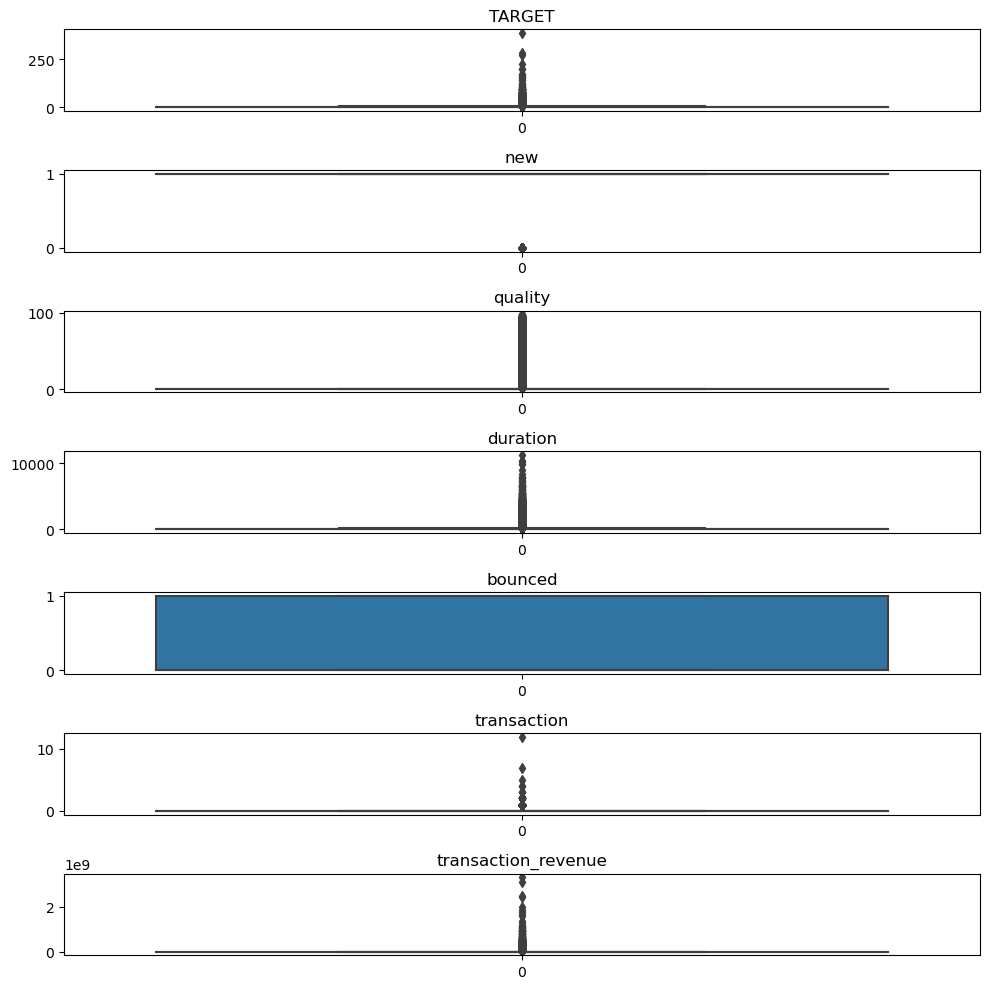

              TARGET            new        quality       duration  \
count  252289.000000  252289.000000  252289.000000  252289.000000   
mean        3.592626       0.751955       3.816805     113.104253   
std         5.509465       0.431879      11.091028     330.876019   
min         1.000000       0.000000       1.000000       0.000000   
25%         1.000000       1.000000       1.000000       0.000000   
50%         2.000000       1.000000       1.000000       3.000000   
75%         4.000000       1.000000       1.000000      71.000000   
max       386.000000       1.000000      98.000000   11186.000000   

             bounced    transaction  transaction_revenue  
count  252289.000000  252289.000000         2.522890e+05  
mean        0.493672       0.009033         9.061248e+05  
std         0.499961       0.100938         2.127689e+07  
min         0.000000       0.000000         0.000000e+00  
25%         0.000000       0.000000         0.000000e+00  
50%         0.000000    

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

descriptive_stats = train_data.describe()

num_features = train_data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize = (10, 10))
for i, col in enumerate(num_features):
    plt.subplot(len(num_features), 1, i+1)
    sns.boxplot(train_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

print(descriptive_stats)

In [10]:
import numpy as np

def feature_engineering(data, is_train=True):
    data['transaction_revenue_log'] = np.log1p(data['transaction_revenue'])
    data['session_duration_log'] = pd.qcut(data['duration'], q=4, labels=False, duplicates='drop')
    quality_median = data['quality'].median()
    data['quality'] = np.where(data['quality'] > data['quality'].quantile(0.95), quality_median, data['quality'])
    if is_train:
        transaction_threshold = data['transaction'].quantile(0.95)
        data = data[data['transaction'] <= transaction_threshold]
    data.drop(['transaction_revenue', 'duration'], axis=1, inplace=True)
    return data

train_data = feature_engineering(train_data, is_train=True)
test_data = feature_engineering(test_data, is_train=False)

train_data.head()



/var/folders/t6/dngzdyds4h36v9fcy0qzhlj40000gn/T/ipykernel_18843/3275157429.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['transaction_revenue', 'duration'], axis=1, inplace=True)


,sessionID,userID,TARGET,browser,OS,device,new,quality,bounced,transaction,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path,transaction_revenue_log,session_duration_log
0,SESSION_000000,USER_000000,17.0,Chrome,Macintosh,desktop,0,1.0,0,0.0,Americas,Northern America,United States,google,organic,Category8,Unknown,0.0,2
1,SESSION_000001,USER_000001,3.0,Chrome,Windows,desktop,1,1.0,0,0.0,Europe,Western Europe,Germany,google,organic,Category8,Unknown,0.0,1
2,SESSION_000002,USER_000002,1.0,Samsung Internet,Android,mobile,1,1.0,1,0.0,Asia,Southeast Asia,Malaysia,(direct),(none),Unknown,Unknown,0.0,0
3,SESSION_000003,USER_000003,1.0,Chrome,Macintosh,desktop,1,1.0,1,0.0,Americas,Northern America,United States,Partners,affiliate,Unknown,Unknown,0.0,0
4,SESSION_000004,USER_000004,1.0,Chrome,iOS,mobile,0,1.0,1,0.0,Americas,Northern America,United States,groups.google.com,referral,Unknown,Category6_Path_0000,0.0,0


In [11]:
train_data.isnull().sum()
test_data.isnull().sum()

sessionID                  0
userID                     0
browser                    0
OS                         0
device                     0
new                        0
quality                    0
bounced                    0
transaction                0
continent                  0
subcontinent               0
country                    0
traffic_source             0
traffic_medium             0
keyword                    0
referral_path              0
transaction_revenue_log    0
session_duration_log       0
dtype: int64

## Primary key uniqueness

- sessionID가 Primary key..!


In [12]:
is_sessionID_unique = train_data['sessionID'].is_unique

is_userID_unique = train_data['userID'].is_unique

is_combined_unique = train_data[['sessionID', 'userID']].duplicated().sum() == 0

print(f"SessionID is unique : {is_sessionID_unique}")
print(f"UserID is unique : {is_userID_unique}")
print(f"Combination of SessionID and UserID is unique : {is_combined_unique}")

SessionID is unique : True
UserID is unique : False
Combination of SessionID and UserID is unique : True


In [13]:
test_data.drop('userID', axis=1)
train_data.drop('userID', axis=1)

,sessionID,TARGET,browser,OS,device,new,quality,bounced,transaction,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path,transaction_revenue_log,session_duration_log
0,SESSION_000000,17.0,Chrome,Macintosh,desktop,0,1.0,0,0.0,Americas,Northern America,United States,google,organic,Category8,Unknown,0.0,2
1,SESSION_000001,3.0,Chrome,Windows,desktop,1,1.0,0,0.0,Europe,Western Europe,Germany,google,organic,Category8,Unknown,0.0,1
2,SESSION_000002,1.0,Samsung Internet,Android,mobile,1,1.0,1,0.0,Asia,Southeast Asia,Malaysia,(direct),(none),Unknown,Unknown,0.0,0
3,SESSION_000003,1.0,Chrome,Macintosh,desktop,1,1.0,1,0.0,Americas,Northern America,United States,Partners,affiliate,Unknown,Unknown,0.0,0
4,SESSION_000004,1.0,Chrome,iOS,mobile,0,1.0,1,0.0,Americas,Northern America,United States,groups.google.com,referral,Unknown,Category6_Path_0000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252284,SESSION_252284,1.0,Chrome,Android,mobile,1,1.0,1,0.0,Europe,Northern Europe,United Kingdom,youtube.com,referral,Unknown,Category5_Path_0032,0.0,0
252285,SESSION_252285,1.0,Chrome,Macintosh,desktop,0,1.0,1,0.0,Americas,Northern America,United States,google,organic,Category8,Unknown,0.0,0
252286,SESSION_252286,5.0,Chrome,Macintosh,desktop,0,2.0,0,0.0,Americas,Northern America,United States,(direct),(none),Unknown,Category1,0.0,1
252287,SESSION_252287,1.0,Android Webview,Android,mobile,1,1.0,0,0.0,Africa,Northern Africa,Egypt,youtube.com,referral,Unknown,Category2_Path_0018,0.0,1


## Label(Target) 분포 확인 방법

In [14]:
label_distribution = train_data['TARGET'].value_counts(normalize=True)
print(label_distribution)

TARGET
1.0      0.503869
2.0      0.134716
3.0      0.094509
4.0      0.057141
5.0      0.042930
           ...   
97.0     0.000004
76.0     0.000004
125.0    0.000004
270.0    0.000004
199.0    0.000004
Name: proportion, Length: 110, dtype: float64


<Axes: xlabel='TARGET', ylabel='count'>

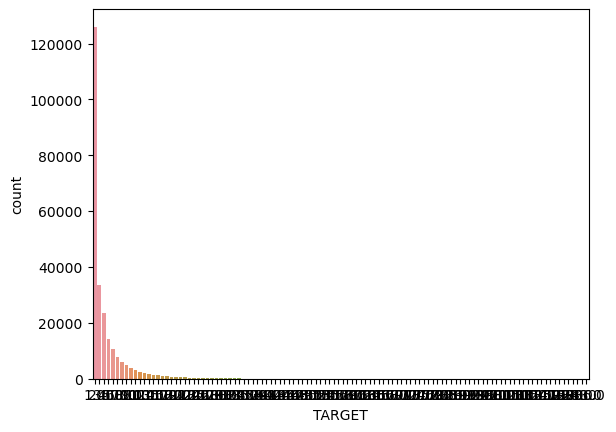

In [15]:
import seaborn as sns
sns.countplot(x='TARGET', data=train_data)

### 변수 간 상관관계 검사

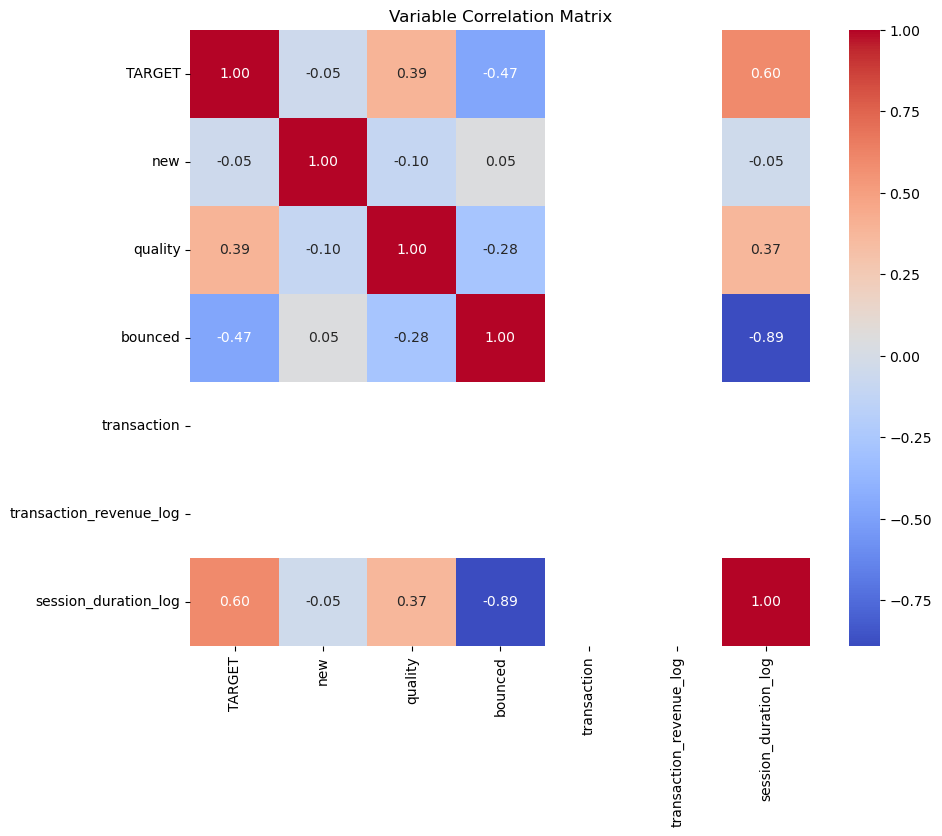

In [16]:
numeric_data = train_data.select_dtypes(include=['float64','int64'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap = 'coolwarm')
plt.title('Variable Correlation Matrix')
plt.show()


1. Target - bounced 
음의 상관관계 (-0.47) 존재
2. duratio_binned - other variable
duration 을 구간으로 나눈 것이 duration_binned
Target (0.60), bounced (-0.89) 음의 상관관계 존재하는데, 구간으로 나누는 것이 'bounced' column 과 밀접한 연관성 존재 판단가능함.
3. quality - bounced
약한 음의 상관관계(-0.27) 존재

## Data scaling

In [17]:
numeric_features = [col for col in train_data.columns if train_data[col].dtype in ['int64', 'float64'] and col != 'TARGET']

if 'TARGET' in numeric_features:
    numeric_features.remove('TARGET')
    
from sklearn.preprocessing import RobustScaler
robust_scalaer = RobustScaler()
train_data[numeric_features] = robust_scalaer.fit_transform(train_data[numeric_features])
test_data[numeric_features] = robust_scalaer.transform(test_data[numeric_features])


## Category variable encoding

범주형 변수의 수가 많아 one-hot encoding과 label encoding 방법을 사용하는 것은 적합하지 않다고 판단하여 Binary encoding or Feature hashing 방법을 사용.

### 1. Binary Encoding

범주형 변수를 정수로 변환한 후 이진수로 표현하고 각 이진 자릿수를 별도의 열로 분할함

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import category_encoders as ce

In [19]:
categorical_columns = train_data.select_dtypes(include=['object', 'category']).columns

encoder = ce.BinaryEncoder(cols=categorical_columns)

train_encoded = encoder.fit_transform(train_data[categorical_columns])
test_encoded = encoder.transform(test_data[categorical_columns])

print(train_encoded)
print(test_encoded)

        sessionID_0  sessionID_1  sessionID_2  sessionID_3  sessionID_4  \
0                 0            0            0            0            0   
1                 0            0            0            0            0   
2                 0            0            0            0            0   
3                 0            0            0            0            0   
4                 0            0            0            0            0   
...             ...          ...          ...          ...          ...   
252284            1            1            1            1            0   
252285            1            1            1            1            0   
252286            1            1            1            1            0   
252287            1            1            1            1            0   
252288            1            1            1            1            0   

        sessionID_5  sessionID_6  sessionID_7  sessionID_8  sessionID_9  ...  \
0                 0

### Hyperparameter tunning and Random_search 

In [20]:
X = pd.concat([train_data[numeric_features], train_encoded], axis=1)
X_test_final = pd.concat([test_data[numeric_features], test_encoded], axis=1)
y = train_data['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)

# hyperparameter tunning
param_distributions = {
    'n_estimators' : [100, 200],
    'max_depth' : [None, 10, 20],
    'min_samples_split' : [2, 5],
    'min_samples_leaf' : [1, 2]
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, n_iter=10, cv=3, scoring='neg_root_mean_squared_error', verbose=2, n_jobs=-1)

random_search.fit(X_train, y_train)

print('Best parameters : ', random_search.best_params_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Test RMSE : {RMSE}')



Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 1.3min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 1.3min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 1.3min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 2.0min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 2.1min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 2.2min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 2.2min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 2.3min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time= 1.4min
[CV] END max_depth=10, m

/Users/b._.chan/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 2.7min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 2.7min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 2.7min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 3.9min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 3.8min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 3.8min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.4min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.4min
Best parameters :  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}
Test RMSE : 3.6491508113774076


### test_data learn and submission.csv file create (category encoding = Binary encoding)

In [21]:
best_model = RandomForestRegressor(n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_depth=10, random_state=42)
best_model.fit(X, y)

y_pred_full = best_model.predict(X_test_final)

submission = pd.read_csv('/Users/b._.chan/Documents/ML_model/weblog_data/sample_submission.csv')
if len(y_pred_full) == len(submission):
    submission['TARGET'] = y_pred_full
    submission.to_csv('/Users/b._.chan/Documents/ML_model/Weblog-based-view-count-prediction/chan_model/binary_encoding_submission.csv', index=False)
    print('제출 파일이 성공적으로 생성되었습니다.')
else:
    print('예측값의 길이와 제출 파일의 행 수가 일치하지 않습니다.')

print('제출 파일 성공적 생성됨.')

제출 파일이 성공적으로 생성되었습니다.
제출 파일 성공적 생성됨.


### 2. Feature hashing

In [22]:
from sklearn.feature_extraction import FeatureHasher

hasher = FeatureHasher(n_features=10, input_type = 'string')

# train data Feature hashing
hashed_features_train = []
for col in categorical_columns:
    hashed_features = hasher.transform(train_data[[col]].astype(str).values)
    hashed_features_train.append(hashed_features.toarray())

hashed_features_train = np.concatenate(hashed_features_train, axis=1)


# test data Feature hashing
hashed_features_test = []
for col in categorical_columns:
    hashed_features = hasher.transform(test_data[[col]].astype(str).values)
    hashed_features_test.append(hashed_features.toarray())

hashed_features_test = np.concatenate(hashed_features_test, axis=1)

In [23]:
hashed_features_train

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 0., -1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0., -1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [24]:
hashed_features_test

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       ...,
       [ 0.,  0., -1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.]])

In [25]:
numeric_data_array = train_data[numeric_features].values

numeric_data_array

array([[-1.,  0.,  0.,  0.,  0.,  2.],
       [ 0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.,  0.],
       ...,
       [-1.,  1.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1.],
       [-1.,  4.,  0.,  0.,  0.,  2.]])

In [26]:
# Numeric features and Hashed features 
X_train = np.concatenate([train_data[numeric_features].values, hashed_features_train], axis=1)
y_train = train_data['TARGET'].values

X_test = np.concatenate([test_data[numeric_features].values, hashed_features_test], axis=1)

# data split
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# model learning
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_split, y_train_split)

# hyperparameter tunning
param_distributions = {
    'n_estimators' : [100, 200],
    'max_depth' : [None, 10, 20],
    'min_samples_split' : [2, 5],
    'min_samples_leaf' : [1, 2]
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, n_iter=10, cv=3, scoring='neg_root_mean_squared_error', verbose=2, n_jobs=-1)

random_search.fit(X_train_split, y_train_split)

print('Best parameters : ', random_search.best_params_)

# best modle predict
best_model = random_search.best_estimator_
y_pred_features = best_model.predict(X_test_split)
RMSE_features = np.sqrt(mean_squared_error(y_test_split, y_pred_features))

print(f"Features Test RMSE : {RMSE_features}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 1.8min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 1.8min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 1.8min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 1.8min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 4.4min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 4.3min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 4.4min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 4.4min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 4.4min
[CV] END max_depth=20, min_sam

In [27]:
X_train_hashed = np.concatenate([train_data[numeric_features].values, hashed_features_train], axis=1)
X_test_hashed = np.concatenate([test_data[numeric_features].values, hashed_features_test], axis=1)

best_params = {'n_estimators' : 100, 'min_samples_split' : 2, 'min_samples_leaf' : 2, 'max_depth' : 10}

model = RandomForestRegressor(**best_params, random_state=42)
model.fit(X_train_hashed, train_data['TARGET'].values)

y_pred_test_full = model.predict(X_test_hashed)

submission_path = '/Users/b._.chan/Documents/ML_model/weblog_data/sample_submission.csv'
submission = pd.read_csv(submission_path)

if len(y_pred_test_full) == len(submission):
    submission['TARGET'] = y_pred_test_full
    submission.to_csv('/Users/b._.chan/Documents/ML_model/Weblog-based-view-count-prediction/chan_model/Feature_submission.csv', index=False)
    print('제출 파일 성공적 생성됨.')
else:
    print(f"예측값의 길이와 제출 파일의 행 수가 일치하지 않습니다. 예측값 길이 : {len(y_pred_test_full)}, 제출 행 수: {len(submission)}")

제출 파일 성공적 생성됨.
